# Assignment 1
___
<b>Author: Aviv Azran<b>

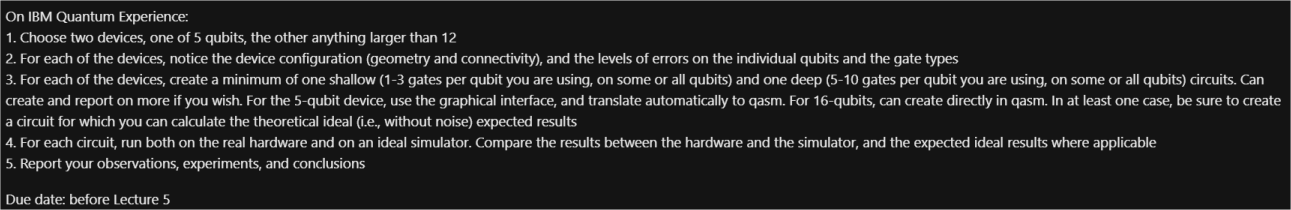

In [2]:
SVG(filename='Task1/assignment.svg')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intoduction" data-toc-modified-id="Intoduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intoduction</a></span><ul class="toc-item"><li><span><a href="#Disappearing-gate-sequence-example" data-toc-modified-id="Disappearing-gate-sequence-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Disappearing gate sequence example</a></span></li></ul></li><li><span><a href="#Devices-and-analysis" data-toc-modified-id="Devices-and-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Devices and analysis</a></span><ul class="toc-item"><li><span><a href="#Geometry-and-error-rate" data-toc-modified-id="Geometry-and-error-rate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Geometry and error rate</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis</a></span></li></ul></li><li><span><a href="#Circuits" data-toc-modified-id="Circuits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Circuits</a></span><ul class="toc-item"><li><span><a href="#Deep-circuit" data-toc-modified-id="Deep-circuit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Deep circuit</a></span><ul class="toc-item"><li><span><a href="#Theoretical-analysis" data-toc-modified-id="Theoretical-analysis-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Theoretical analysis</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#5-Qubit-device" data-toc-modified-id="5-Qubit-device-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>5 Qubit device</a></span></li><li><span><a href="#16-Qubits-device" data-toc-modified-id="16-Qubits-device-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>16 Qubits device</a></span></li></ul></li><li><span><a href="#Shallow-circuit" data-toc-modified-id="Shallow-circuit-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Shallow circuit</a></span><ul class="toc-item"><li><span><a href="#Theoretical-analysis" data-toc-modified-id="Theoretical-analysis-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Theoretical analysis</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#5-Qubit-device" data-toc-modified-id="5-Qubit-device-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>5 Qubit device</a></span></li><li><span><a href="#16-Qubit-device" data-toc-modified-id="16-Qubit-device-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>16 Qubit device</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Deep-circuit" data-toc-modified-id="Deep-circuit-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Deep circuit</a></span></li><li><span><a href="#Shallow-circuit" data-toc-modified-id="Shallow-circuit-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Shallow circuit</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [2]:
from qiskit import *
import qiskit.visualization as qv
from qiskit.tools.monitor import job_monitor
import qiskit.tools.jupyter
import qiskit.tools
from qiskit.providers.aer import QasmSimulator
from IPython.core.display import SVG,Image
%matplotlib inline

In [4]:
API_KEY="1534ff76fd87c3669c8b4167a072cc22a76a83d771ed7bf93e6d8966265e4b6930cbc520f65e27aff471c802aa7d8f810c1eab5f8900151ff9070fa7ee5c85a8"
try:
    IBMQ.enable_account(API_KEY)
except:
    a=1
provider = IBMQ.get_provider(hub='ibm-q')

In [27]:
backend1_16 = provider.get_backend('ibmq_16_melbourne') # 16 Qubits
backend2_5 = provider.get_backend('ibmq_ourense') # 5 Qubits
simulator=Aer.get_backend('qasm_simulator') # simuulator

In [ ]:
def plot_circ(circ):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10, 10))
    fig.subplots(1,3)
    axes = fig.axes
    for a in axes:
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
    axes[0].set_title('Designed circuit - depth='+str(circ.depth()))
    axes[2].set_title('Transpiled circuit (5 Qubits) - depth='+str(transpile(circ,backend2_5).depth()))
    axes[1].set_title('Transpiled circuit (16 Qubits) - depth='+str(transpile(circ,backend1_16).depth()))
    qv.circuit_drawer(circ,output='mpl',ax=axes[0],scale=1.5)
    qv.circuit_drawer(transpile(circ,backend2_5),output='mpl',ax=axes[2],scale=1.5)
    qv.circuit_drawer(transpile(circ,backend1_16),output='mpl',ax=axes[1],scale=1.5)

## Intoduction
___

building the circuits under specific depth requirements isn't such an easy task since the the circuits are being transpiled by IBM code before running on actual devices.
There are numerous reasons for that such as the geometry of each device, which dictates the way a certain gate is being implemented.   
each device has a specific universal set of gates and thus, a circuit consisting ONLY of the gates present in its set will be (under certain conditions) transpiled as at was designed, while on a different device, it will be transpiled to a version which consists of the device's set of gates.  
Another thing which impacts the traspiled circuit is the presence of gate sequences which can be written simply as the identiy operator$\,I$.<br>
those Sequences appear to be deleted completely in the transpiled version of the circuit. <br>
let's see an example:

### Disappearing gate sequence example
___

We will take the following simple sequence:<br>
\begin{equation}\label{eq:}
XX=I
\end{equation}



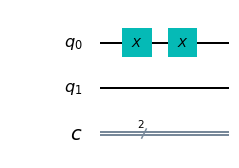

In [29]:
dagger_example=QuantumCircuit(2,2)
dagger_example.x(0)
dagger_example.x(0)
qv.circuit_drawer(circuit=dagger_example,output='mpl')

using qiskit command `depth()`  allows us to get the depth of the circuit.

In [30]:
'dagger_example depth is:' + str(dagger_example.depth())

'dagger_example depth is:2'

Now we'll have a look at the the transpiled circuit, which can be generated using `transpile(circuit,backend)` where `backend` represents the device used (and thus, the function is bound to return a different circuit for devices constructed differently)

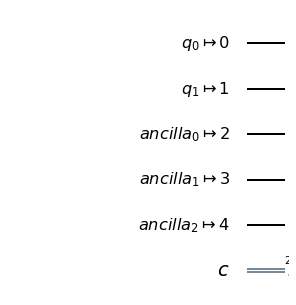

In [31]:
dagger_example_transpiled= transpile(dagger_example,backend2_5)
qv.circuit_drawer(circuit=dagger_example_transpiled,output='mpl')

And if we use the `depth()` function again...

In [32]:
'dagger_example_transpiled depth is:' + str(dagger_example_transpiled.depth())

'dagger_example_transpiled depth is:0'

Moreover, the a device's geometry is a crucial attribute to take into consideration when designing a circuit as we will see in the upcoming designs.<br>
To conclude, in order the construct a circuit which will enable us to REALLY witness the the effects of noise, dephasing or any other phenomenons arise of physical limitations, we must first achieve a circuit design which will be transpiled into a circuit which still the depth demand.<br>
In the upcoming sections we will build circuits based on "weak spots" found in the analysis of the error-geometry diagrams of the devices.

## Devices and analysis
___

I've chosen the following devices:
1. `ibmq_16_melbourne` - (16 qubits)
2. `ibmq_ourense` - (5 qubits)


### Geometry and error rate

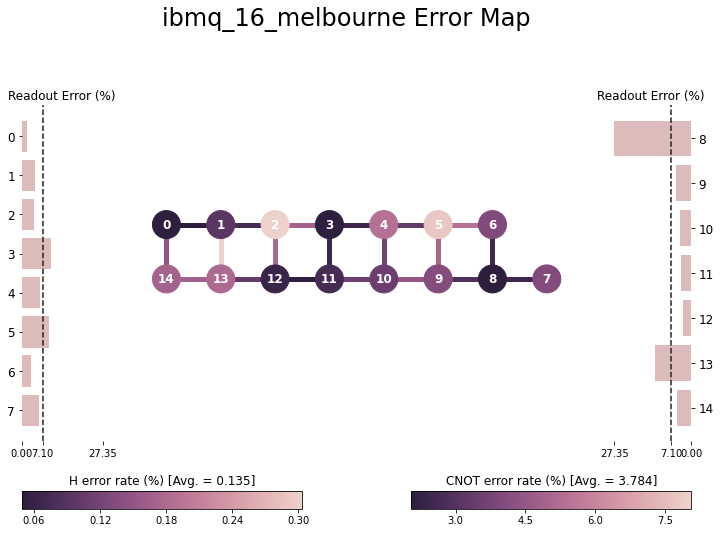

In [33]:
qv.plot_error_map(backend1_16)

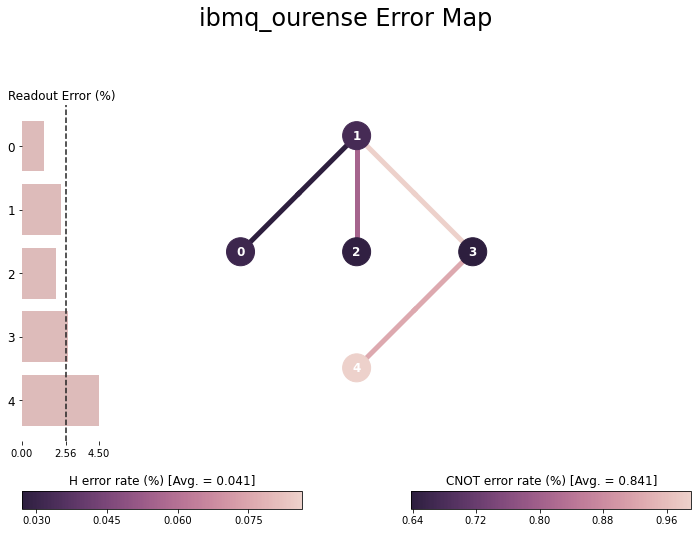

In [34]:
qv.plot_error_map(backend2_5)

### Analysis
___
Examining the devices geometry, can see that for both devices, interactions between *q2* and *q4* for example aren't direct.<br> it is achieved by interacting with the qubits that are directly connected whith each other.
the meaning is that applying CNOT with *q2* and *q4* as control and target can't be implemented directly. let's build a circuit to show this.

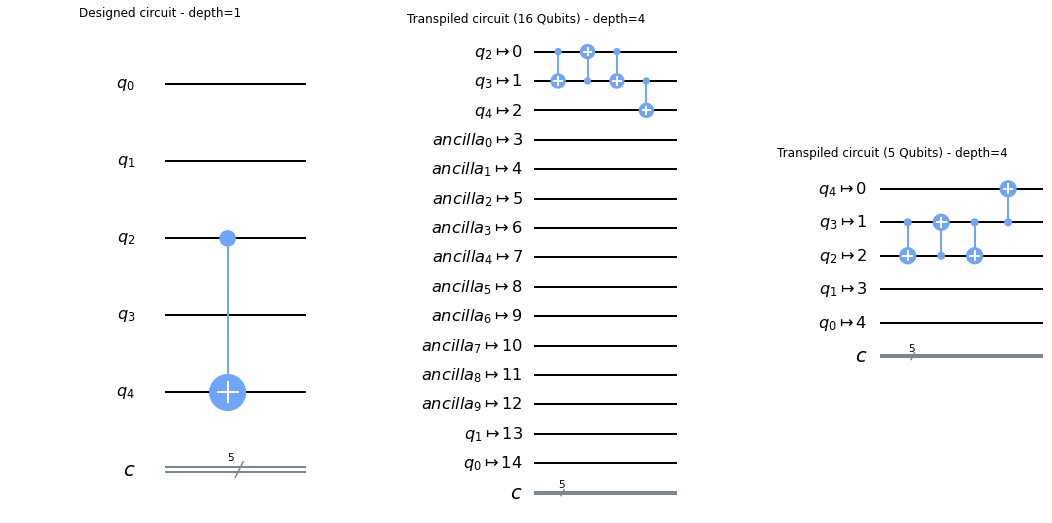

In [91]:
cnot_circ=QuantumCircuit(5,5)
cnot_circ.cx(2,4)
plot_circ(cnot_circ)

## Circuits
___
Knowing the above and taking the relatively high error rate of the CNOT gate into account, suggests that we can use the gate we used above to construct a circuit with high sensitivity to errors and noise.<br>
Taking the transpilation matter into account, we'll try to overcome the depth difference between different devices by constructing circuits which will be transpiled into circuits with the same depth for both 5 and 16 qubits devices.<br>
This is achieved by examining the coupling diagrams of the devices.

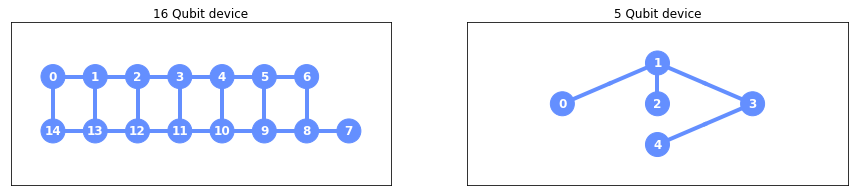

In [64]:
fig = plt.figure(figsize=(15, 3))
fig.subplots(1,2)
axes = fig.axes
for a in axes:
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
axes[0].set_title('16 Qubit device')
axes[1].set_title('5 Qubit device')
qv.plot_gate_map(backend1_16,ax=axes[0])
qv.plot_gate_map(backend2_5,ax=axes[1])

For each of the two circuits we will use qubits featuring the same distance from each other to preserve the depth

### Deep circuit
<a id='deep'></a>
___

In [3]:
meas_circ=QuantumCircuit(5,5)
l=[4,3,2,1,0]
meas_circ.measure(l,l)

cnot_circ=QuantumCircuit(5,5)
cnot_circ.x(0)
cnot_circ.barrier()
cnot_circ.cx(0,3)
cnot_circ=cnot_circ+meas_circ

plot_circ(cnot_circ)

NameError: name 'plot_circ' is not defined

#### Theoretical analysis
___
For an intial quantum state $\left|\psi_{0}\right\rangle=|00000 \ldots .0\rangle$, the state after $X$ is $\left|\psi_{0}\right\rangle=|10000 \ldots .0\rangle$, and after the CNOT gate $\left|\psi_{0}\right\rangle=|10010 \ldots .0\rangle$
___

#### Simulation
___

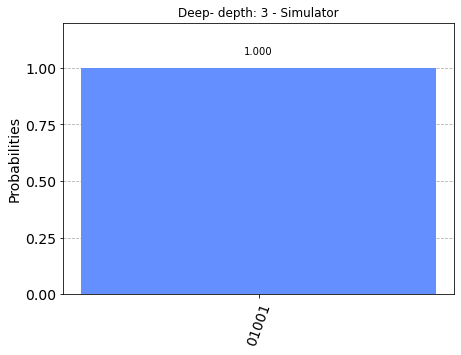

In [4]:
simulator = Aer.get_backend('qasm_simulator')
# Execute and get counts
shallow_sim = execute(cnot_circ, simulator).result()
counts = shallow_sim.get_counts(cnot_circ)
qv.plot_histogram(counts,title=('Deep- depth: '+str(cnot_circ.depth())+' - Simulator'))

#### 5 Qubit device
<a id='deep_5'></a>
___

In [40]:
shallow_5_job=execute(cnot_circ, backend2_5,shots=1024)
job_monitor(shallow_5_job)

Job Status: job has successfully run


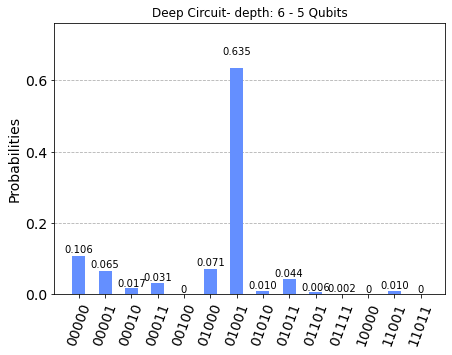

In [43]:
shallow_res_5=shallow_5_job.result()
counts_5 = shallow_res_5.get_counts(cnot_circ)
qv.plot_histogram(counts_5,title=('Deep Circuit- depth: '+str(transpile(cnot_circ,backend2_5).depth())+' - 5 Qubits'))


<div class="alert alert-block alert-info">
   <b>
    difference between probabilities for expected state:  36.5%
   </b>  
</div>


#### 16 Qubits device
<a id='deep_16'></a>
___

In [46]:
shallow_16_job=execute(cnot_circ, backend1_16,shots=1024)
job_monitor(shallow_16_job)

Job Status: job has successfully run


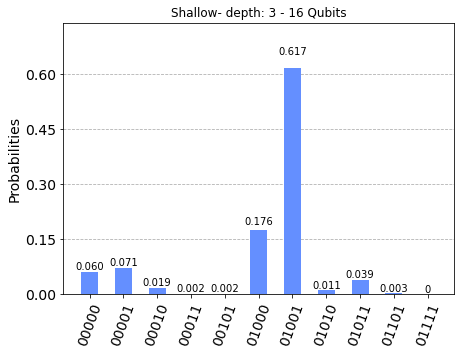

In [47]:
shallow_res_16=shallow_16_job.result()
counts_16 = shallow_res_16.get_counts(cnot_circ)
qv.plot_histogram(counts_16,title=('Shallow- depth: '+str(cnot_circ.depth())+' - 16 Qubits'))

<div class="alert alert-block alert-info">
   <b>
    difference between probabilities for expected state:  38.3%
   </b>  
</div>


### Shallow circuit
<a id='shallow'></a>
#### Theoretical analysis
___
For an intial quantum state $\left|\psi_{0}\right\rangle=|00000 \ldots .0\rangle$, the state after $X$ is $\left|\psi_{0}\right\rangle=|10000 \ldots .0\rangle$, and after the CNOT gate $\left|\psi_{0}\right\rangle=|11000 \ldots .0\rangle$

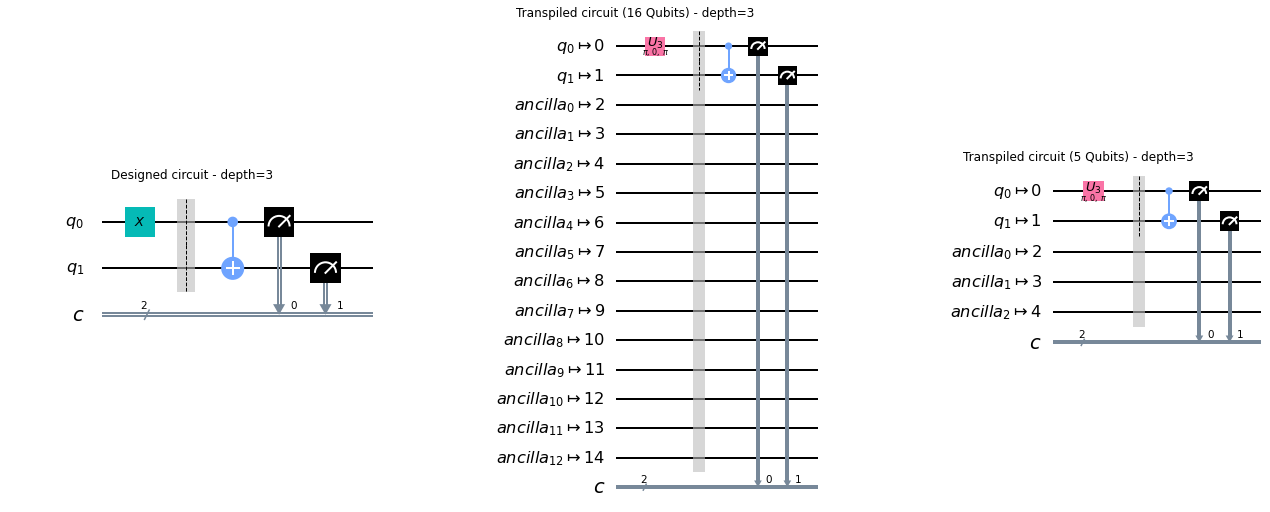

In [90]:
circ2 = QuantumCircuit(2, 2)
circ2.x(0)
circ2.barrier()
circ2.cx(0, 1)

measure_circ2 = QuantumCircuit(2, 2)
measure_circ2.measure([0,1], [0,1])
circ2=circ2+measure_circ2

plot_circ(circ2)

#### Simulation
<a id='shallow_sim'></a>
___

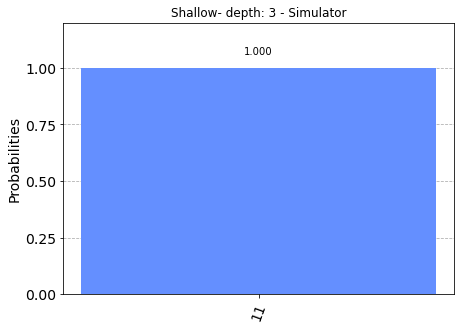

In [21]:
simulator = Aer.get_backend('qasm_simulator')
# Execute and get counts
shallow_circ2_sim = execute(circ2, simulator).result()
counts = shallow_circ2_sim.get_counts(circ2)
qv.plot_histogram(counts,title=('Shallow- depth: '+str(circ2.depth())+' - Simulator'))

#### 5 Qubit device
<a id='shallow_5'></a>
___

In [ ]:
deep_5_job=execute(circ2, backend2_5,shots=1024)
job_monitor(deep_5_job)

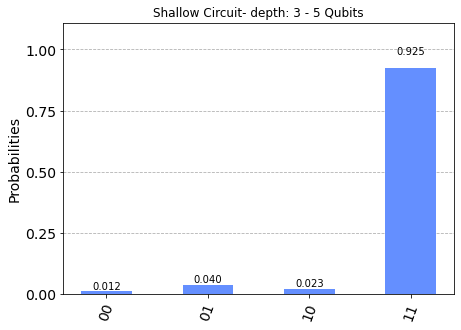

In [24]:
deep_res_5=deep_5_job.result()
counts_deep_5 = deep_res_5.get_counts(circ2)
qv.plot_histogram(counts_deep_5,title=('Shallow Circuit- depth: '+str(transpile(circ2,backend2_5).depth())+' - 5 Qubits'))


<div class="alert alert-block alert-info">
   <b>
    difference between probabilities for expected state: 7.5%
   </b>  
</div>

#### 16 Qubit device
<a id='shallow_16'></a>
___

In [93]:
deep_16_job=execute(circ2, backend1_16,shots=1024)
job_monitor(deep_16_job)

Job Status: job has successfully run


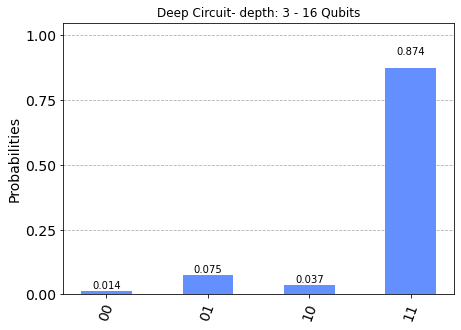

In [94]:
deep_res_16=deep_16_job.result()
counts_16_deep = deep_res_16.get_counts(circ2)
qv.plot_histogram(counts_16_deep,title=('Deep Circuit- depth: '+str(circ2.depth())+' - 16 Qubits'))

<div class="alert alert-block alert-info">
<b>difference between probabilities for expected state: 12.6%</b>  
</div>

## Conclusion
___
In this assignment we designed two circuits, each of different depth, and compared their output when running on 3 different platforms: simulator, 5 qubit device and 16 qubit device.
We saw that the devices differ of each other in a few aspects such as the qubits coupling, the gates used to implement operations, T1,T2 times (which we haven't discussed about here) and more.<br>
By observing the coupling diagrams we constructed circuits which hold the depth requirements even after the transpilation process, allowing us to bypass the issue of bad correlation between the designed and transpiled circuits.
We used CNOT based operations for the circuits, for the reason that those feature high error rate with respect to other gates.

### Deep circuit
___

We saw that depth difference between the design and the transpilation was 3 for a single use of CNOT.<br>
The 5-qubit device produced a high error of 36.5% relative to the simulation, while the 16-qubit device produced 38.3% error.

### Shallow circuit
___
depth value of 3 achieved across both devices and matched the initial design.<br>
for the 5-qubit device we got 7.5% error relative to the simulation. much better than we got for the deep circuit.
Yet,  for the 16-qubit device we got an error of 12.6% relative to simulation
### Summary
___
We saw that for both circuits, the 16-qubit device produced results with higher error compared to simulation and 5-qubits device.
we can deduce that this is due to the qubits influencing each other, and thus, more qubits means more influence.
In addition, the enviorment noise is also to be taken into account in future analisys.

<div class="alert alert-block alert-info">
<b>Note:</b> difference between devices also arise of the different implementation of the same unitary operation on a single qubit, but since we were asked to construct only two circuits with depth demands, I have decided not to address the issue here.
</div>